In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Data Generation

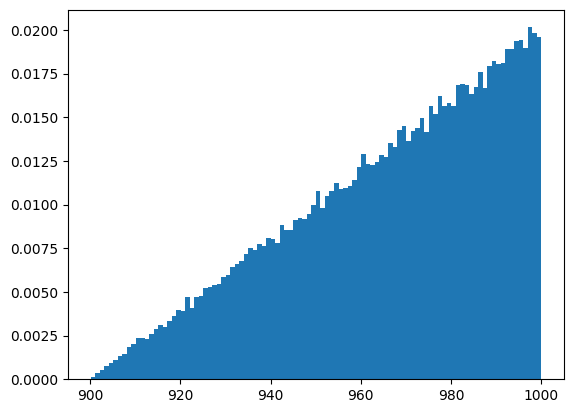

<function matplotlib.pyplot.show(close=None, block=None)>

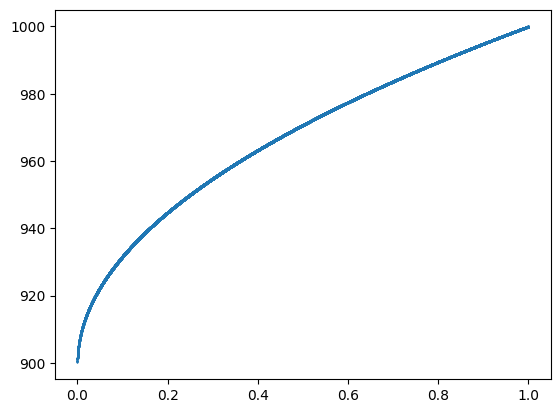

In [17]:
np.random.seed(61)

# generate uniform distribution
n = 100000
x = np.random.uniform(0, 1, n)

# generate reserve prices
a = 1/10000
b = -9/50
c = 81 - x
reserve_prices = (-(b) + np.sqrt(b**2 - 4*a*c)) / (2*a)

# plot histogram
plt.hist(reserve_prices, bins=100, density=True)
plt.show()

# plot scatter plot
plt.scatter(x, reserve_prices, s=0.1)
plt.show

In [45]:
print(reserve_prices.shape)
print(reserve_prices)

(100000,)
[990.80030154 942.58517729 993.66572309 ... 982.25007683 985.85114168
 968.05119973]


# Defining Helper Functions for Sims

In [20]:
def get_p(avg, h):
    return (1000-avg)/(1000-h)

def decide(rp, l, h, island_avg=990):
    if (l >= rp):
        return 1000 - l
    elif (h >= rp):
        if (h < island_avg):
            p = get_p(island_avg, h)
        else:
            p = 1
        return (1000 - h) * p
    else:
        return 0


In [25]:
def find_l(h, island_avg):
    max_total = 0
    iter = 0
    all_totals = {}
    for l in range(900, h):
        total = 0
        for rp in reserve_prices:
            total += decide(rp, l, h, island_avg)
        all_totals[total] = l
        max_total = max(max_total, total)
        iter += 1
        if iter % 500 == 0:
            print(f"i_no: {iter}, max profit: {max_total}, bids: {all_totals[max_total]}")
    return all_totals[max_total]

print(find_l(978, 978))

952


### Testing Pandas

In [27]:
test = pd.Series()
test[0] = 2
print(test)

0    2
dtype: int64


# Starting Sims

In [29]:
# for each island average, find all the expected profits given other possible island averages
expected_profits = pd.Series()
iter = 0
for island_avg_guess in range(978, 1000):
    expected_profits = pd.Series()
    high_bid = island_avg_guess

    # find the l that maximizes the expected profit
    l = find_l(high_bid, island_avg_guess)

    # find the expected profit for each possible actual island average
    for actual_island_avg in range(978, 1000):
        total = 0
        for rp in reserve_prices:
            total += decide(rp, l, high_bid, actual_island_avg)
        expected_profits[actual_island_avg] = total
        
        iter += 1
        if iter % 50 == 0:
            print(f"i_no: {iter}, island_avg: {actual_island_avg}, profit: {total}")
    
    expected_profits.to_csv(f"evs/expected_profits_{island_avg_guess}.csv")




i_no: 50, island_avg: 983, profit: 1925576.0
i_no: 100, island_avg: 989, profit: 1764077.0
i_no: 150, island_avg: 995, profit: 1572027.0
i_no: 200, island_avg: 979, profit: 1953557
i_no: 250, island_avg: 985, profit: 1908257
i_no: 300, island_avg: 991, profit: 1856796
i_no: 350, island_avg: 997, profit: 1600520.0
i_no: 400, island_avg: 981, profit: 1674424
i_no: 450, island_avg: 987, profit: 1581189


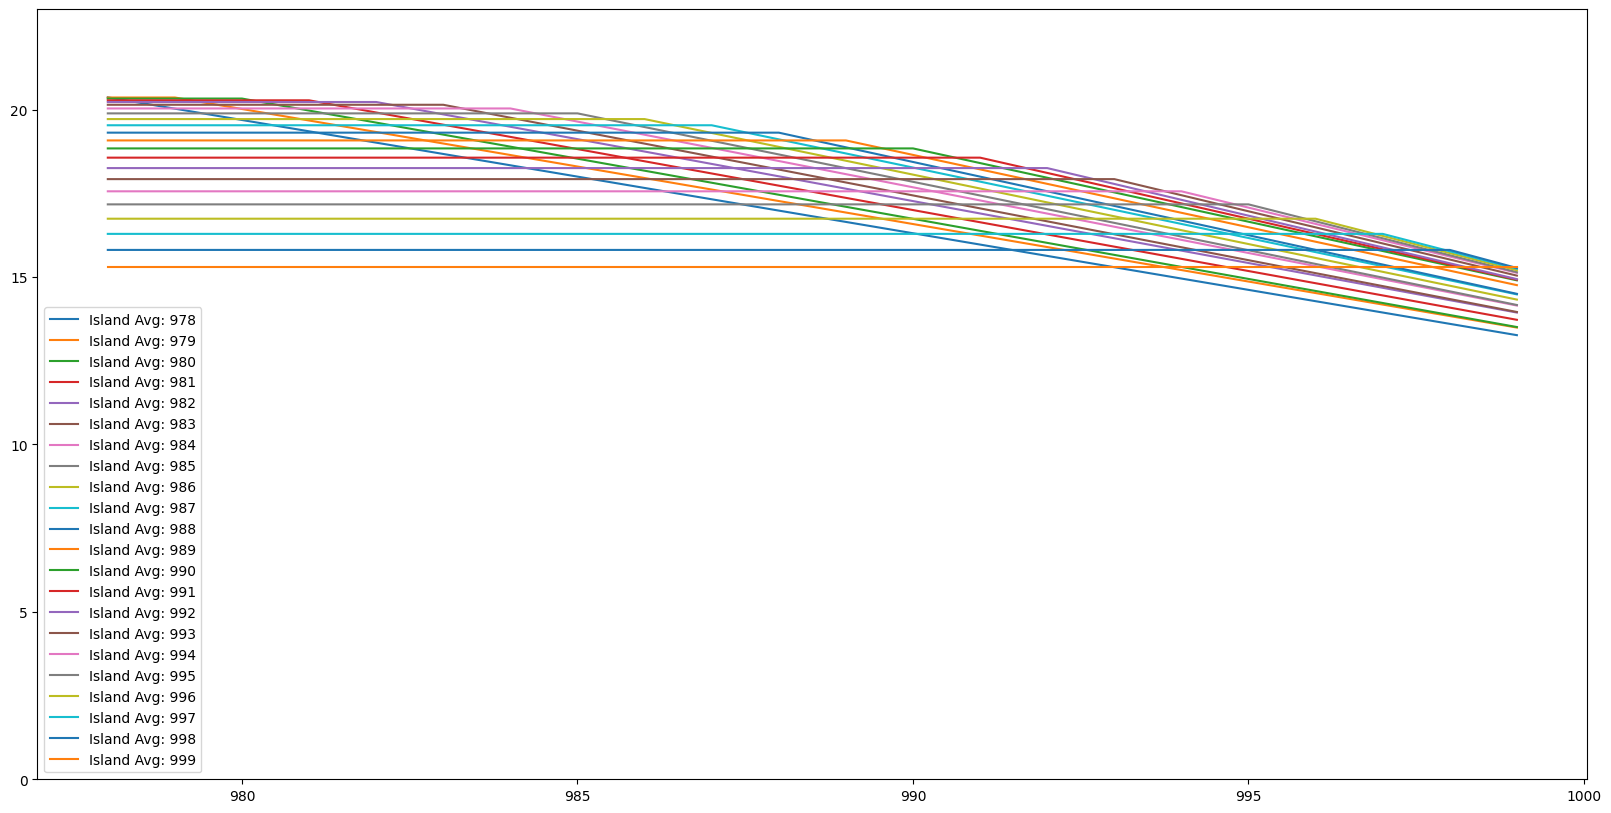

In [44]:
plt.figure(figsize=(20, 10))
# start y at 0
plt.ylim(0, 23)
for island_avg_guess in range(978, 1000):
    expected_profits = pd.read_csv(f"evs/expected_profits_{island_avg_guess}.csv")
    plt.plot(expected_profits["Unnamed: 0"], expected_profits["0"]/len(reserve_prices), label=f"Island Avg: {island_avg_guess}")
plt.legend()